### Introdução

#### Breve descrição da base de dados

O banco de dados utilizado é uma série temporal de emissões de Dióxido de Carbono (CO2) vindas de combustão de combustíveis fósseis e produção de cimento. Estão incluídas estimativas de várias nações, começando em 1751, e incluem emissões de consumo de combustíveis sólidos, líquidos e gasosos, produção de cimento e combustão de gás em “flares” industriais. As estimativas foram geradas a partir do banco de dados das Estatísticas de Energia das Nações Unidas e as estatísticas de pesquisas geológicas dos Estado Unidos acerca da produção de cimento.

Neste pacote de dados é possível encontrar planilhas (.csv) de estimativas globais e nacionais de emissão de CO2 assim como arquivos de texto com o ranqueamento de emissão por país e per capita para o respectivo ano.

Fonte: https://data.ess-dive.lbl.gov/view/doi%3A10.15485%2F1712447

O intuito dessa análise foi comparar as emissões de dióxido de carbono entre grandes emissores e gerar gráficos que permitam a fácil visualização desses dados.

O resultado chama atenção ao que têm apresentado inúmeras organizações como o IPCC (Intergovernmental Panel on Climate Change) e a NASA (National Aeronautics and Space Administration), que alertam para os perigos da mudança climática impulsionada pela queima de combustíveis fósseis e o consequente agravamento do efeito estufa.

### Processamento

Para o tratamento de dados foram criados subsets baseados em uma lista de maiores emissores de CO2, presente no conjunto de arquivos original.

Foi criado um range para selecionar anos (de 1902 a 2010 e de 1951 a 2010) para melhor aproveitar os dados presentes.

Foi preciso tratar alguns dados de tipo object para que se transformassem em tipo float.

### Conclusão

Como aponta a reportagem "Analysis: Which countries are historically responsible for climate change?", o aquecimento global e consequente mudança climática assumem contornos condizentes com desigualdades globais de um problema compartilhado. Nossos gráficos permitem visualizar que, dentre quatro dos maiores poluidores do mundo, em uma série histórica são dois dos países do Norte Global que têm o maior índice de emissão de CO2 per capita. Dito de outra forma, os países do Sul Global sofrerão os devastadores efeitos de um problema que, historicamente, não é de sua responsabilidade.

Fonte: https://www.carbonbrief.org/analysis-which-countries-are-historically-responsible-for-climate-change/

Considerando que a emissão de CO2 está intimamente ligada à industrialização, é possível perceber os contornos destes processos nos países selecionados. Por exemplo, é possível visualizar nos anos que antecedem a virada para a década de 1960 um crescimento acentuado na curva da China, possivelmente ligada aos processos de industrialização do "Grande Salto para Frente", associado com o governo de Mao Tsé-Tung. Também é possível observar, nos dados relativos à USSR (e posteriormente, Federação Russa), uma queda acentuada a partir da década de 1990, o que parece corresponder à queda do regime soviético.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("nation_1751_2017.csv")

In [3]:
df = pd.DataFrame(df)

In [4]:
df.shape

(17928, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17928 entries, 0 to 17927
Data columns (total 10 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Nation                                                                                   17928 non-null  object
 1   Year                                                                                     17928 non-null  int64 
 2   Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)  17928 non-null  int64 
 3   Emissions from solid fuel consumption                                                    17928 non-null  object
 4   Emissions from liquid fuel consumption                                                   17928 non-null  object
 5   Emissions from gas fuel consumption                                

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# conferindo os tipos de dados
# como podemos ver, a linha "Per capita CO2 emissions (metric tons of carbon)" é composta de dados 'object'

df.dtypes

Nation                                                                                     object
Year                                                                                        int64
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)     int64
Emissions from solid fuel consumption                                                      object
Emissions from liquid fuel consumption                                                     object
Emissions from gas fuel consumption                                                        object
Emissions from cement production                                                            int64
Emissions from gas flaring                                                                 object
Per capita CO2 emissions (metric tons of carbon)                                           object
Emissions from bunker fuels (not included in the totals)                                    int64
dtype: object

In [8]:
# criando um subset com os 5 maiores emissores (contagem do documento 'top2017_tot.txt')

top5_emissores = df[df['Nation'].isin(['CHINA (MAINLAND) ', 'UNITED STATES OF AMERICA ', 'INDIA ', 'RUSSIAN FEDERATION ', 'USSR ', 'JAPAN ', 'JAPAN (EXCLUDING THE RUYUKU ISLANDS) '])]

In [9]:
top5_emissores.sample(30)

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
3124,CHINA (MAINLAND),1966,142566,128212,12158,701,1496,0,0.19,0
3133,CHINA (MAINLAND),1975,312410,247445,55729,4632,4084,520,0.34,0
17222,USSR,1907,25267,18719,6548,0,0,.,.,0
3069,CHINA (MAINLAND),1911,7600,7600,0,0,0,.,.,0
7581,INDIA,1925,11986,10981,1006,0,0,.,.,0
16878,UNITED STATES OF AMERICA,1815,164,164,0,0,0,.,.,0
17002,UNITED STATES OF AMERICA,1939,455203,279745,138689,33876,2892,.,.,0
17038,UNITED STATES OF AMERICA,1975,1201617,314200,609917,266957,8602,1941,5.41,14355
3132,CHINA (MAINLAND),1974,269434,211818,49829,3941,3400,446,0.3,0
17238,USSR,1923,12382,8008,4367,7,0,.,.,0


In [10]:
# criando um range de anos de 1902 a 2010

filtered_df_selected_years_top5 = top5_emissores[(top5_emissores['Year'] > 1901) & (top5_emissores['Year'] <= 2010)]

In [11]:
# criando um range de anos de 1951 a 2010

filtered_df_selected_years_top5_1950_2010 = top5_emissores[(top5_emissores['Year'] > 1950) & (top5_emissores['Year'] <= 2010)]

In [12]:
filtered_df_selected_years_top5.shape

(545, 10)

In [13]:
filtered_df_selected_years_top5_1950_2010.shape

(300, 10)

In [14]:
# selecionando anos únicos nos subsets

unique_years_top5 = np.unique(filtered_df_selected_years_top5['Year'])

In [15]:
unique_years_top5_1950_2010 = np.unique(filtered_df_selected_years_top5_1950_2010['Year'])

In [16]:
# selecionando linhas referentes a países específicos (emissão total de CO2)
china_emissions = filtered_df_selected_years_top5.loc[filtered_df_selected_years_top5['Nation'] == 'CHINA (MAINLAND) ', 'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)']

# convertendo 'china_emissions' de uma série para um array
CHINA = china_emissions.to_numpy()

In [17]:
# selecionando linhas referentes a países específicos (emissão per capita)
china_emissions_percapita = filtered_df_selected_years_top5_1950_2010.loc[filtered_df_selected_years_top5_1950_2010['Nation'] == 'CHINA (MAINLAND) ', 'Per capita CO2 emissions (metric tons of carbon)']

CHINA_percapita = china_emissions_percapita.to_numpy()

In [18]:
usa_emissions = filtered_df_selected_years_top5.loc[filtered_df_selected_years_top5['Nation'] == 'UNITED STATES OF AMERICA ', 'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)']

USA = usa_emissions.to_numpy()

In [19]:
usa_emissions_percapita = filtered_df_selected_years_top5_1950_2010.loc[filtered_df_selected_years_top5_1950_2010['Nation'] == 'UNITED STATES OF AMERICA ', 'Per capita CO2 emissions (metric tons of carbon)']

USA_percapita = usa_emissions_percapita.to_numpy()

In [20]:
india_emissions = filtered_df_selected_years_top5.loc[filtered_df_selected_years_top5['Nation'] == 'INDIA ', 'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)']

INDIA = india_emissions.to_numpy()

In [21]:
india_emissions_percapita = filtered_df_selected_years_top5_1950_2010.loc[filtered_df_selected_years_top5_1950_2010['Nation'] == 'INDIA ', 'Per capita CO2 emissions (metric tons of carbon)']

INDIA_percapita = india_emissions_percapita.to_numpy()

In [22]:
# criando condições para filtrar linhas que correspondam à União Soviética e a Federação Russa

condition1 = filtered_df_selected_years_top5['Nation'] == 'USSR '
condition2 = filtered_df_selected_years_top5['Nation'] == 'RUSSIAN FEDERATION '

# filtrando linhas a partir destas condições
russia_data = filtered_df_selected_years_top5[condition1 | condition2]

# agrupando os dados por ano e agregando essas informações na variável 'russia_emissions'
russia_emissions = russia_data.groupby('Year')['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'].sum()

RUSSIA = russia_emissions.to_numpy()

In [23]:
# aqui pulou-se o cálculo de emissão per capita da Rússia porque não havia dados o suficiente no banco de dados

In [24]:
condition3 = filtered_df_selected_years_top5['Nation'] == 'JAPAN (EXCLUDING THE RUYUKU ISLANDS) '
condition4 = filtered_df_selected_years_top5['Nation'] == 'JAPAN '

japan_data = filtered_df_selected_years_top5[condition3 | condition4]

japan_emissions = japan_data.groupby('Year')['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'].sum()

JAPAN = japan_emissions.to_numpy()

In [25]:
condition5 = filtered_df_selected_years_top5_1950_2010['Nation'] == 'JAPAN (EXCLUDING THE RUYUKU ISLANDS) '
condition6 = filtered_df_selected_years_top5_1950_2010['Nation'] == 'JAPAN '

japan_data_percapita = filtered_df_selected_years_top5_1950_2010[condition5 | condition6]

japan_emissions_percapita = japan_data_percapita.groupby('Year')['Per capita CO2 emissions (metric tons of carbon)'].sum()

JAPAN_percapita = japan_emissions_percapita.to_numpy()

In [26]:
plotando = pd.DataFrame({
    'x': unique_years_top5,
    'China': CHINA,
    'USA': USA,
    'India': INDIA,
    'Japan': JAPAN,
    'Russia': RUSSIA
})


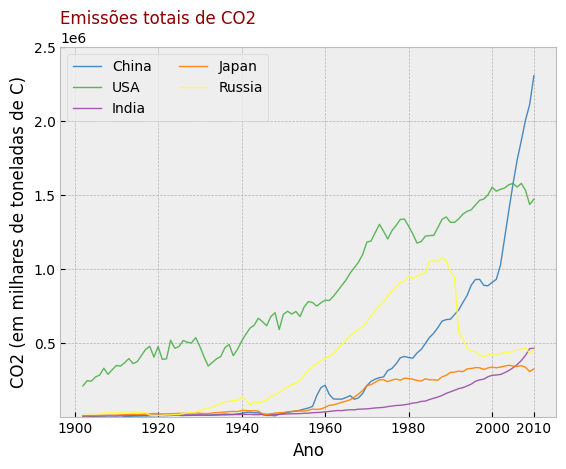

In [34]:
# escolhendo um estilo do gráfico
plt.style.use('bmh')

# criando uma paleta de cores
palette = plt.get_cmap('Set1')

# plotando várias linhas usando um laço for
num = 0
for column in plotando.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando['x'], plotando[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo uma escala no eixo y que faz sentido para os dados

plt.ylim(1000,2500000)
custom_x = [1900, 1920, 1940, 1960, 1980, 2000, 2010]
plt.xticks(custom_x, ['1900', '1920', '1940', '1960', '1980', '2000', '2010'])

plt.title("Emissões totais de CO2", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("CO2 (em milhares de toneladas de C)")



plt.savefig('emissoes_totais.png')

In [28]:
plotando_percapita = pd.DataFrame({
    'x': unique_years_top5_1950_2010,  # Extract 'Year' column
    'China': CHINA_percapita,
    'USA': USA_percapita,
    'India': INDIA_percapita,
    'Japan': JAPAN_percapita
})

In [29]:
# como podemos ver, os valores extraídos 
# da coluna "Per capita CO2 emissions (metric tons of carbon)" continua composta de dados 'object'

plotando_percapita.dtypes

x         int64
China    object
USA      object
India    object
Japan    object
dtype: object

In [30]:
# convertendo os dados para float

plotando_percapita_float = plotando_percapita.astype(float)

In [31]:
plotando_percapita_float.dtypes

x        float64
China    float64
USA      float64
India    float64
Japan    float64
dtype: object

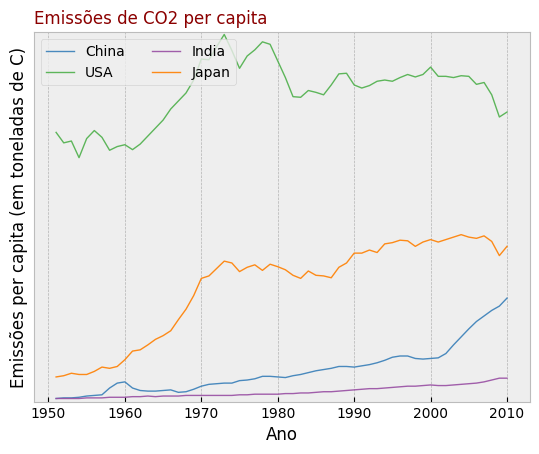

In [33]:
plt.style.use('bmh')

palette = plt.get_cmap('Set1')

num = 0
for column in plotando_percapita_float.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_percapita_float['x'], plotando_percapita_float[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo uma escala no eixo y que faz sentido para os dados

plt.ylim(0, 6)
custom_x = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
plt.xticks(custom_x, ['1950', '1960', '1970', '1980', '1990', '2000', '2010'])

plt.yticks([])

plt.title("Emissões de CO2 per capita", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Emissões per capita (em toneladas de C)")



plt.savefig('emissoes_percapita.png')